In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import statsmodels.stats as stats
from statsmodels.stats import stattools
%matplotlib inline

In [12]:
start = datetime.datetime(1980,1,1)
end = datetime.datetime(2019,12,5)

In [13]:
sp500 = web.DataReader('^GSPC', 'yahoo',start,end)

In [14]:
sp500 = sp500.drop(['High','Low','Open','Close','Volume'],axis=1)

In [15]:
sp500[246:255]

,Adj Close
Date,
1980-12-22,135.779999
1980-12-23,135.300003
1980-12-24,135.880005
1980-12-26,136.570007
1980-12-29,135.029999
1980-12-30,135.330002
1980-12-31,135.759995
1981-01-02,136.339996
1981-01-05,137.970001


In [16]:
sp500['PctChg'] = sp500['Adj Close'].pct_change().fillna(0)

The JB test p-value is:  0.0
We reject the hypothesis that the data is normally distributed  True
The skewness of the returns is:  -0.739790054587932
The kurtosis of the returns is:  23.233658607398493


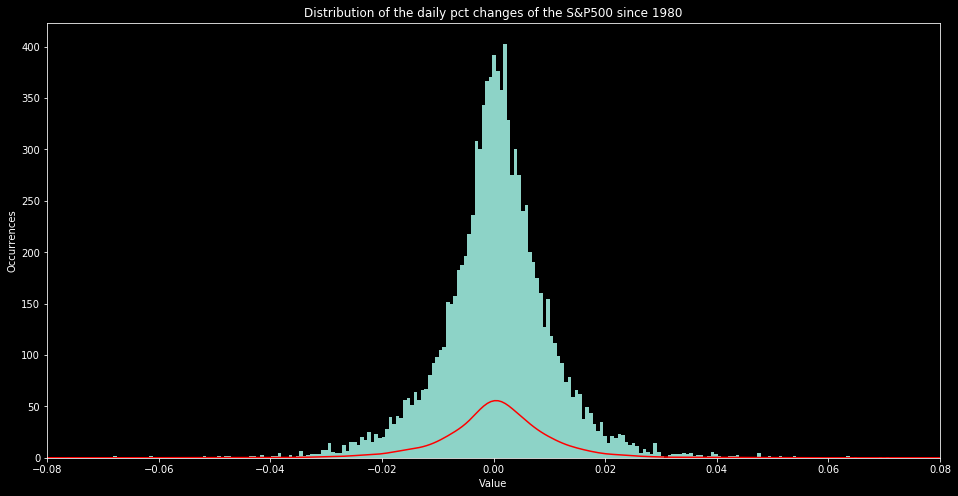

In [17]:
cutoff = 0.01
_, p_value, skewness, kurtosis = stattools.jarque_bera(sp500['PctChg'].dropna())
print("The JB test p-value is: ", p_value)
print ("We reject the hypothesis that the data is normally distributed ", p_value < cutoff)
print ("The skewness of the returns is: ", skewness)
print ("The kurtosis of the returns is: ", kurtosis)
plt.style.use('dark_background')
sp500['PctChg'].hist(bins = 500,figsize=(16,8))
sp500['PctChg'].plot(kind='kde',color='r')
plt.xlim(-0.08,0.08)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Distribution of the daily pct changes of the S&P500 since 1980');

In [18]:
sp500['PctChg']+=1

In [21]:
sp500['CumulRtn28d'] = sp500['PctChg'].rolling(28).apply(np.prod,raw=True)

In [20]:
start = datetime.date.today()
end = datetime.date(2020,1,17)
days = np.busday_count(start,end)
days

29

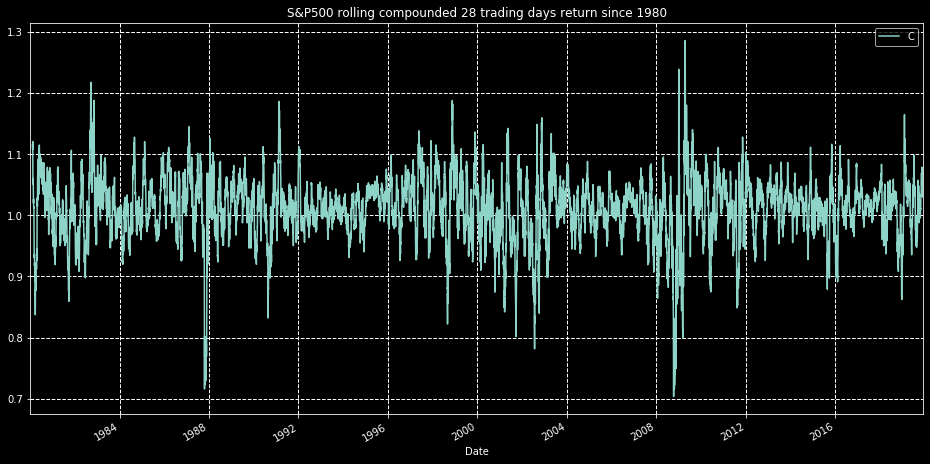

In [33]:
plt.style.use('dark_background')
sp500['CumulRtn28d'].plot(figsize=(16,8))
plt.legend('Cumulative 28d compounded return')
plt.grid(linestyle='--', linewidth=1)
plt.title('S&P500 rolling compounded 28 trading days return since 1980');

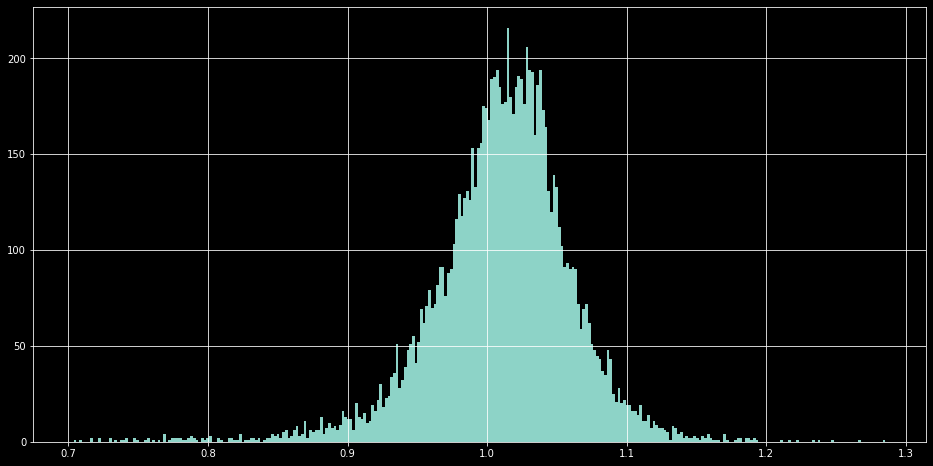

In [35]:
sp500['CumulRtn28d'].hist(bins=300,figsize=(16,8))

In [48]:
cumulRtn28d_values = sp500['CumulRtn28d'].dropna().values

In [49]:
cumulRtn28d_values.mean()

1.0106189458445276

In [50]:
atm_call = (cumulRtn28d_values - 1)*((cumulRtn28d_values-1)>0)

In [51]:
atm_call.mean()

0.02466029444697457

In [52]:
3145.90*atm_call.mean()

77.5788203007373

In [53]:
atm_put = -(cumulRtn28d_values - 1)*((cumulRtn28d_values-1)<0)

In [54]:
atm_put.mean()

0.014041348602446786

In [55]:
3145.9*atm_put.mean()

44.17267856843734